<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/03_Unsupervised_modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
!pip install pyLDAvis

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
questions = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.iloc[:, 1:]#questions.drop('Unnamed: 0', axis=1)

tags = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/tags.csv')
tags = tags.iloc[:, 1:]#questions.drop('Unnamed: 0', axis=1)

In [31]:
questions['Question'] = questions['Question'].apply(lambda text: str(text).split())
tags['Tag_st'] = tags['Tag_st'].apply(lambda text: str(text).split())

In [32]:
questions = questions['Question'] 
questions.head(10)

0            [pandas, pandas, list, dataframe, object]
1                                        [php, string]
2    [json, performance, json, function, select, js...
3    [java, java, class, class, static, string, joi...
4    [stream, video, browser, stream, video, browse...
5    [pandas, pandas, date, indexing, date, date, d...
6                                           [dns, php]
7    [php, ide, constants, reflection, web, php, ph...
8                                            [process]
9    [jquery, javascript, jquery, javascript, jquer...
Name: Question, dtype: object

In [34]:
tags = tags['Tag_st'] 
tags.head(10)

0             [python, pandas]
1                        [php]
2    [performance, postgresql]
3       [java, multithreading]
4       [flash, video, stream]
5                     [pandas]
6            [php, mysql, dns]
7                        [php]
8           [ios, objective-c]
9         [javascript, jquery]
Name: Tag_st, dtype: object

In [35]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [36]:
len(dictionary)

358

In [37]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 5), (10, 2), (11, 1), (12, 1), (13, 1), (14, 6)],
 [(5, 1), (8, 2), (15, 4), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1)],
 [(21, 3),
  (22, 2),
  (23, 5),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 11),
  (28, 6),
  (29, 1)],
 [(3, 2), (6, 4), (30, 1)],
 [(4, 1), (31, 1)],
 [(4, 5),
  (7, 1),
  (15, 1),
  (29, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2)],
 [(38, 1)],
 [(7, 1), (26, 2), (39, 3)],
 [(40, 1)],
 [(13, 1), (41, 1), (42, 1)],
 [(9, 3), (14, 1), (43, 1), (44, 1), (45, 1)],
 [(25, 1), (32, 2)],
 [(14, 1), (41, 4), (46, 3), (47, 4)],
 [(2, 1)],
 [(15, 2), (21, 1), (29, 1), (48, 1), (49, 1), (50, 1), (51, 2)],
 [(5, 1), (15, 1), (17, 6), (43, 3), (52, 2)],
 [(2, 3),
  (3, 2),
  (5, 4),
  (6, 2),
  (13, 4),
  (14, 1),
  (16, 1),
  (22, 16),
  (42, 1),
  (53, 2),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 22),
  (58, 3),
  (59, 12),
  (60, 1),
  (61, 3),
  (62, 1)],
 [(1, 1), (6

In [38]:
len(corpus)

40000

In [39]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=5, num_words=5))

In [40]:
from gensim.models import CoherenceModel

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values =[]
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [48]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions, start=2, limit=40, step=2) 

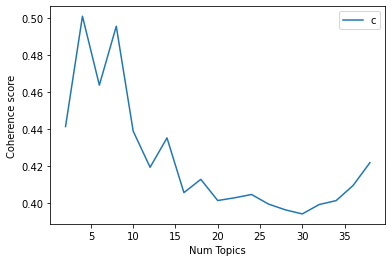

In [49]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
for nt, cs in zip(x, coherence_values):
  print("Num Topics =", nt, "is having Coherence score of", round(cs, 4))

Num Topics = 2 is having Coherence score of 0.4413
Num Topics = 4 is having Coherence score of 0.5008
Num Topics = 6 is having Coherence score of 0.4636
Num Topics = 8 is having Coherence score of 0.4954
Num Topics = 10 is having Coherence score of 0.4388
Num Topics = 12 is having Coherence score of 0.4193
Num Topics = 14 is having Coherence score of 0.4351
Num Topics = 16 is having Coherence score of 0.4056
Num Topics = 18 is having Coherence score of 0.4128
Num Topics = 20 is having Coherence score of 0.4013
Num Topics = 22 is having Coherence score of 0.4028
Num Topics = 24 is having Coherence score of 0.4046
Num Topics = 26 is having Coherence score of 0.3994
Num Topics = 28 is having Coherence score of 0.3963
Num Topics = 30 is having Coherence score of 0.3941
Num Topics = 32 is having Coherence score of 0.3992
Num Topics = 34 is having Coherence score of 0.4013
Num Topics = 36 is having Coherence score of 0.4094
Num Topics = 38 is having Coherence score of 0.4218


In [51]:
lda = gensim.models.ldamodel.LdaModel

In [52]:
ldamodel = lda(corpus, num_topics=8, id2word = dictionary, passes=50)

In [53]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=8, num_words=10))
print("LDA model is: \n")
for idx, topic in ldamodel.print_topics(num_topics=8, num_words=3):
    print("Topic: {} \nTags: {}".format(idx, topic))
    #print("\n")

LDA model is: 

Topic: 0 
Tags: 0.184*"class" + 0.131*"text" + 0.112*"import"
Topic: 1 
Tags: 0.310*"function" + 0.060*"javascript" + 0.052*"jquery"
Topic: 2 
Tags: 0.435*"android" + 0.123*"layout" + 0.062*"git"
Topic: 3 
Tags: 0.175*"string" + 0.096*"list" + 0.084*"object"
Topic: 4 
Tags: 0.349*"java" + 0.058*"xml" + 0.044*"spring"
Topic: 5 
Tags: 0.232*"file" + 0.179*"c" + 0.067*"python"
Topic: 6 
Tags: 0.088*"url" + 0.079*"web" + 0.074*"php"
Topic: 7 
Tags: 0.180*"time" + 0.101*"r" + 0.092*"date"


In [58]:
def main_topics(model=ldamodel, corpus=corpus, texts=questions, tags=tags):
  topics_df = pd.DataFrame()

  for i, row in enumerate(model[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  topics_df.columns = ['Main_Topic', 'Importance', 'Topic_Keywords']

  contents = pd.Series(texts)
  tags = pd.Series(tags)
  topics_df = pd.concat([topics_df, contents, tags], axis=1)
  return(topics_df)

df_topic_keywords = main_topics(model=ldamodel, corpus=corpus, texts=questions, tags=tags)

df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Question_No', 'Main_Topic', 'Importance', 'Tags_pred', 'Question', 'Tags_True']


AttributeError: ignored

   Question_No  ...                  Tags_True
0            0  ...           [python, pandas]
1            1  ...                      [php]
2            2  ...  [performance, postgresql]
3            3  ...     [java, multithreading]
4            4  ...     [flash, video, stream]
5            5  ...                   [pandas]
6            6  ...          [php, mysql, dns]
7            7  ...                      [php]
8            8  ...         [ios, objective-c]
9            9  ...       [javascript, jquery]

[10 rows x 6 columns]

In [60]:

df_tags = df_dominant_topic[['Tags_True', 'Tags_pred']]
df_tags

AttributeError: ignored

                       Tags_True                                          Tags_pred
0               [python, pandas]  time, r, date, memory, ruby, stream, ios, vide...
1                          [php]  url, web, php, json, api, service, post, http,...
2      [performance, postgresql]  time, r, date, memory, ruby, stream, ios, vide...
3         [java, multithreading]  java, xml, spring, apache, exception, class, i...
4         [flash, video, stream]  time, r, date, memory, ruby, stream, ios, vide...
...                          ...                                                ...
39995     [scala, intellij-idea]  java, xml, spring, apache, exception, class, i...
39996            [dart, flutter]  function, javascript, jquery, module, angular,...
39997  [reactjs, webpack, redux]  function, javascript, jquery, module, angular,...
39998          [python, twitter]  url, web, php, json, api, service, post, http,...
39999               [.net, linq]  string, list, object, null, class, set, se

In [ ]:
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_visualisation = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualisation)

In [ ]:
#wordvec = Word2Vec(questions, min_count=1)

In [ ]:
#print('wordvec:', wordvec)

In [ ]:
#words = list(wordvec.wv.vocab)

In [ ]:
#print("\nwords", words)

In [ ]:
#print("\nwordvec['function'] :", wordvec['function'])

In [ ]:
#wordvec.save('wordvec.bin')

In [ ]:
#new_wordvec = Word2Vec.load('wordvec.bin')

In [ ]:
#print("\nloaded wordvec", new_wordvec)

In [ ]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from matplotlib import pyplot

In [ ]:
#X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
#tsne = TSNE(n_components=2)
#result = tsne.fit_transform(X)

In [ ]:
#plt.figure(figsize=(25,25))
#pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
#for i, word in enumerate(words):
  #pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#pyplot.show()